In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
import sklearn
import statsmodels
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import requests
import pprint
import xgboost
import scipy
from scipy import stats
from xgboost import XGBClassifier
from urllib import parse
from bs4 import BeautifulSoup

# 지수 형태의 실수를 소수점 3자리까지 표기
pd.options.display.float_format = "{:.3f}".format

# 공유 폴더 경로
dirShare = "G:/.shortcut-targets-by-id/188U2ypi3eUvuInaixMTTbbFctprRo9e4/GYM살라빔"


In [21]:
# 라이브러리 버전 확인
print("pandas 현재 버전 : " + pd.__version__)
print("scikit-learn 현재 버전 : " + sklearn.__version__)
print("scipy 현재 버전 : "+ scipy.__version__)
print("statsmodels 현재 버전 : " + statsmodels.__version__)
print("xgboost 현재 버전 : " + xgboost.__version__)

pandas 현재 버전 : 2.0.3
scikit-learn 현재 버전 : 1.3.0
scipy 현재 버전 : 1.11.1
statsmodels 현재 버전 : 0.14.0
xgboost 현재 버전 : 1.7.6


# 데이터 불러오고 전처리

In [6]:
# train.csv 데이터 프레임으로 불러오기
df = pd.read_csv(dirShare+"/data/train.csv")

# df 정보 확인
df.info()

# df 상위 10개 불러오기
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             301 non-null    int64  
 1   OC                  301 non-null    object 
 2   sido                301 non-null    object 
 3   sgg                 301 non-null    int64  
 4   openDate            301 non-null    int64  
 5   bedCount            296 non-null    float64
 6   instkind            300 non-null    object 
 7   revenue1            293 non-null    float64
 8   salescost1          293 non-null    float64
 9   sga1                293 non-null    float64
 10  salary1             293 non-null    float64
 11  noi1                293 non-null    float64
 12  noe1                293 non-null    float64
 13  interest1           293 non-null    float64
 14  ctax1               293 non-null    float64
 15  profit1             293 non-null    float64
 16  liquidAs

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175.000,nursing_hospital,4217530010.000,0.000,3961134739.000,...,758993742.000,222876855.000,0.000,536116887.000,390000000.000,2619290493.000,1271224493.000,62.000,64.000,same
1,3,open,gyeongnam,32,19970401,410.000,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.000,813.000,same
2,4,open,gyeonggi,89,20161228,468.000,nursing_hospital,1004521989.000,515483669.000,447219722.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,234.000,1.000,same
3,7,open,incheon,141,20000814,353.000,general_hospital,72507342181.000,0.000,70677397660.000,...,37755010512.000,17018596586.000,9219427379.000,20736413926.000,15100000000.000,12954271998.000,7740829037.000,663.000,663.000,same
4,9,open,gyeongnam,32,20050901,196.000,general_hospital,49043538016.000,0.000,47656051197.000,...,51432592890.000,30072585842.000,17593752360.000,21360007048.000,14108027465.000,5561941.000,9025549604.000,206.000,197.000,same
5,11,open,gyeongnam,155,20020501,243.000,general_hospital,33580536703.000,9222996930.000,23727912054.000,...,0.000,21861133888.000,17087136895.000,20000000.000,0.000,0.000,5879003604.000,397.000,390.000,same
6,14,open,gyeonggi,169,19820702,213.000,general_hospital,22552179836.000,4449958166.000,16573328452.000,...,19642026834.000,13292026834.000,12155602473.000,6350000000.000,6230000000.000,18888294786.000,9174282922.000,221.000,246.000,same
7,15,open,busan,66,19871102,250.000,general_hospital,64359169160.000,20758010719.000,40882537264.000,...,35984818131.000,11219645317.000,0.000,24765172814.000,16000000000.000,14217864484.000,9177282701.000,489.000,489.000,same
8,16,open,jeonnam,91,20060922,280.000,nursing_hospital,12748392940.000,328697683.000,11076189315.000,...,0.000,13113246330.000,12664417803.000,41962676.000,0.000,0.000,0.000,243.000,243.000,same
9,17,open,seoul,4,20000124,55.000,general_hospital,41406077905.000,6624671265.000,35120182720.000,...,34906729636.000,19675893406.000,16365396427.000,15230836230.000,3400000000.000,20244525873.000,9554580715.000,370.000,382.000,same


In [7]:
# 데이터 개수 확인하기
print("데이터 개수 : ", df.shape[0])

# len(df)를 써도 동일

데이터 개수 :  301


In [8]:
# 숫자 형식의 컬럼의 기술통계값을 출력
df.describe()

,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
count,301.000,301.000,301.000,296.000,293.000,293.000,293.000,293.000,293.000,293.000,...,293.000,293.000,293.000,293.000,293.000,293.000,293.000,293.000,291.000,288.000
mean,219.056,81.040,20050125.801,145.709,12881747447.993,2014902794.594,10332439064.089,5654114566.904,269615124.573,511587022.570,...,222670.000,8146026488.788,3860583593.406,1510050431.986,4471247363.877,2709978815.423,5273919018.089,978627865.256,142.546,134.326
std,121.235,50.970,88938.154,118.924,20435433475.616,7460270656.568,14938862491.946,8083342530.256,802370115.514,1060379255.452,...,3811496.447,12557995349.365,6797242094.076,2953412250.368,7659580436.397,4564001070.999,10812593821.248,4688797890.975,160.191,151.062
min,1.000,1.000,19780124.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,-20147802018.000,-2781506722.000,0.000,0.000
25%,112.000,37.000,20011017.000,52.750,3252111902.000,0.000,2758200772.000,1626052720.000,8217133.000,80133952.000,...,0.000,1283220350.000,285574118.000,0.000,25578782.000,0.000,1017572570.000,0.000,53.500,53.750
50%,230.000,75.000,20071126.000,136.500,5524218104.000,210410492.000,4684074465.000,2659892367.000,43637641.000,183196506.000,...,0.000,3784552900.000,1454049945.000,85425488.000,1969746813.000,1100000000.000,2894969804.000,0.000,80.000,79.000
75%,321.000,123.000,20111021.000,193.000,12748392940.000,910527771.000,10778762060.000,6363400069.000,205033071.000,420333030.000,...,0.000,8465053127.000,4364713622.000,1567966980.000,4905441439.000,3360000000.000,5370284792.000,101444685.000,181.500,170.000
max,428.000,178.000,20170607.000,656.000,151000000000.000,98503322990.000,103000000000.000,64035593950.000,9144170639.000,8686379500.000,...,65242310.000,85088583901.000,68468775764.000,17593752360.000,51503883627.000,32561472110.000,125000000000.000,68527297093.000,1200.000,1200.000


In [9]:
# 컬럼별 null 값 확인하기
df.shape[0] - df.count()

inst_id                0
OC                     0
sido                   0
sgg                    0
openDate               0
bedCount               5
instkind               1
revenue1               8
salescost1             8
sga1                   8
salary1                8
noi1                   8
noe1                   8
interest1              8
ctax1                  8
profit1                8
liquidAsset1           8
quickAsset1            8
receivableS1           8
inventoryAsset1        8
nonCAsset1             8
tanAsset1              8
OnonCAsset1            8
receivableL1           8
debt1                  8
liquidLiabilities1     8
shortLoan1             8
NCLiabilities1         8
longLoan1              8
netAsset1              8
surplus1               8
revenue2               8
salescost2             8
sga2                   8
salary2                8
noi2                   8
noe2                   8
interest2              8
ctax2                  8
profit2                8


In [10]:
# 아직 운영 중인 병원을 1로 변환
df.replace({"open":1},inplace=True)
# 폐업한 병원을 0으로 변환
df.replace({" close":0}, inplace=True)
# unique() 메서드를 통해 "OC" 컬럼의 데이터를 확인
df["OC"].unique()

array([1, 0], dtype=int64)

In [11]:
# 오너 변환 여부
df["ownerChange"].replace({"same":0},inplace=True)
df["ownerChange"].replace({"change":1},inplace=True)
df["ownerChange"].unique()

array([ 0.,  1., nan])

In [12]:
# 병원의 종류를, get_dummies를 이용해 one-hot-encoding
df = pd.get_dummies(df, columns=["instkind"], prefix=["instkind"], prefix_sep="_", dtype=int)

In [13]:
# 병원 정보에 NULL이 존재하는 부분을 다른 값으로 대체할 수 없음
# 병원의 매출, 비용, 이익, 직원 수와 같은 값을 다른 병원의 평균이나 중앙값으로 대체하면 안 됨
# 회귀대체법을 하기에는 종속 변수로 둘 만한 속성값이 존재 X
# null이 포함된 데이터가 전체 데이터의 10% 미만이므로 

df.dropna(axis=0, how="any", inplace=True)
df.shape[0]

277

In [14]:
# 데이터 값이 0으로만 돼 있는 컬럼 삭제
df.drop(columns=["receivableL1", "receivableL2"], axis=1, inplace=True)
# 시군구 코드 삭제
df.drop(columns="sgg", axis=1, inplace=True)
# 병원 id는 분석에 있어서 의미가 없는 데이터이므로 삭제
df.drop(columns="inst_id",inplace=True)
# 데이터 프레임에서 drop 됐는지 확인
df.columns

Index(['OC', 'sido', 'openDate', 'bedCount', 'revenue1', 'salescost1', 'sga1',
       'salary1', 'noi1', 'noe1', 'interest1', 'ctax1', 'profit1',
       'liquidAsset1', 'quickAsset1', 'receivableS1', 'inventoryAsset1',
       'nonCAsset1', 'tanAsset1', 'OnonCAsset1', 'debt1', 'liquidLiabilities1',
       'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1',
       'revenue2', 'salescost2', 'sga2', 'salary2', 'noi2', 'noe2',
       'interest2', 'ctax2', 'profit2', 'liquidAsset2', 'quickAsset2',
       'receivableS2', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2',
       'OnonCAsset2', 'debt2', 'liquidLiabilities2', 'shortLoan2',
       'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2', 'employee1',
       'employee2', 'ownerChange', 'instkind_clinic', 'instkind_dental_clinic',
       'instkind_general_hospital', 'instkind_hospital',
       'instkind_nursing_hospital', 'instkind_traditional_clinic',
       'instkind_traditional_hospital'],
      dtype='object')

In [15]:
df_drop_obj = copy.deepcopy(df)  # 깊은 복사
df_dr_obj_cols = df_drop_obj.columns.to_list()
# df_dr_obj_cols

🫡시도코드와 시군구 코드를 학습시킬 수도 있습니다.  
One-Hot Encoding을 이용하면 되죠.  
하지만 재무 정보와 관련된 현 데이터에서는 의미가 없을 것 같습니다.  
그 이유는 지역의 이름 자체가, 변수로서 큰 영향력을 가지지는 않을 것 같거든요!!  
지역이 변수로 영향을 가지려면, 그 지역의 면적, 인구밀도, 평균 소득💸 등으로 대체해야 할 것 같습니다.  
일단 지금은 재무 정보에 대한 것으로만 예측을 해보죠!  

In [16]:
df_drop_obj2 = copy.deepcopy(df_drop_obj)

# 컬럼 데이터 타입이 'object'인 컬럼 삭제
for i in range(len(df_dr_obj_cols)) : 
    if df_drop_obj.iloc[:,i].dtype == "object" : 
        df_drop_obj2.drop(columns=df_dr_obj_cols[i], inplace=True)

df_drop_obj = df_drop_obj2
df_drop_obj.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 0 to 296
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OC                             277 non-null    int64  
 1   openDate                       277 non-null    int64  
 2   bedCount                       277 non-null    float64
 3   revenue1                       277 non-null    float64
 4   salescost1                     277 non-null    float64
 5   sga1                           277 non-null    float64
 6   salary1                        277 non-null    float64
 7   noi1                           277 non-null    float64
 8   noe1                           277 non-null    float64
 9   interest1                      277 non-null    float64
 10  ctax1                          277 non-null    float64
 11  profit1                        277 non-null    float64
 12  liquidAsset1                   277 non-null    float64


In [17]:
# 개업한 날짜는 변수로서 의미가 없음. 모델은 날짜를 인식하지 못하기 때문에
# 개업 날짜와 폐업 날짜의 차이로 변수를 조정할 필요가 있음

from datetime import datetime
date_of_2018 = "2018-01-01"

# 문자 타입을 date 타입으로
date_of_2018 = datetime.strptime(date_of_2018, "%Y-%m-%d")

df_drop_obj["openDate"] = df_drop_obj["openDate"].apply(lambda x : datetime.strptime(str(x), "%Y%m%d"))

# 날짜 차이를 새로운 컬럼으로 생성, 데이터 프레임 중간에 삽입
df_drop_obj.insert(1, "dif_date", date_of_2018-df_drop_obj["openDate"])
df_drop_obj["dif_date"] = df_drop_obj["dif_date"].dt.days

In [18]:
# 개업 날짜를 drop한 새로운 데이터프레임 생성
df_hos = df_drop_obj.drop(columns="openDate")

In [19]:
df_hos.head(10)

,OC,dif_date,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,...,employee1,employee2,ownerChange,instkind_clinic,instkind_dental_clinic,instkind_general_hospital,instkind_hospital,instkind_nursing_hospital,instkind_traditional_clinic,instkind_traditional_hospital
0,1,3657,175.000,4217530010.000,0.000,3961134739.000,2033835290.000,15652441.000,15236236.000,13236236.000,...,62.000,64.000,0.000,0,0,0,0,1,0,0
2,1,369,468.000,1004521989.000,515483669.000,447219722.000,296402310.000,76156.000,30000.000,0.000,...,234.000,1.000,0.000,0,0,0,0,1,0,0
3,1,6349,353.000,72507342181.000,0.000,70677397660.000,31786048663.000,506223059.000,1259567512.000,1196881219.000,...,663.000,663.000,0.000,0,0,1,0,0,0,0
4,1,4505,196.000,49043538016.000,0.000,47656051197.000,24460782270.000,112352259.000,1419089382.000,1307248652.000,...,206.000,197.000,0.000,0,0,1,0,0,0,0
5,1,5724,243.000,33580536703.000,9222996930.000,23727912054.000,16655333342.000,65414325.000,741269419.000,336462245.000,...,397.000,390.000,0.000,0,0,1,0,0,0,0
6,1,12967,213.000,22552179836.000,4449958166.000,16573328452.000,11073956461.000,305646045.000,970008848.000,940942802.000,...,221.000,246.000,0.000,0,0,1,0,0,0,0
7,1,11018,250.000,64359169160.000,20758010719.000,40882537264.000,26822603567.000,1426186507.000,3166922895.000,465983760.000,...,489.000,489.000,0.000,0,0,1,0,0,0,0
8,1,4119,280.000,12748392940.000,328697683.000,11076189315.000,7155936637.000,261621144.000,579079483.000,167471911.000,...,243.000,243.000,0.000,0,0,0,0,1,0,0
9,1,6552,55.000,41406077905.000,6624671265.000,35120182720.000,19796589281.000,708476429.000,1000118143.000,448540747.000,...,370.000,382.000,0.000,0,0,1,0,0,0,0
10,1,3604,250.000,49669173562.000,8844036521.000,38845605937.000,22985012106.000,423613410.000,2034357679.000,1462729706.000,...,53.000,53.000,0.000,0,0,1,0,0,0,0


In [23]:
# 독립변수 컬럼 샤피로 윌크 검정으로 정규성 확인

cnt = 0

for i in range(df_hos.shape[1]) : 
    cnt += 1
    shapiro_tt = stats.shapiro(df_hos.iloc[:,i])
    print(cnt)
    if shapiro_tt[1] > 0.05 : 
        print("컬럼명 ",df_hos.columns[i],"는(은) 귀무가설을 채택, 정규성을 따른다고 가정할 수 있습니다.")
    else : 
        print("컬럼명 ",df_hos.columns[i],"는(은) 귀무가설을 기각, 정규성을 따른다고 가정할 수 없습니다.")
    print("-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-")

1
컬럼명  OC 는(은) 귀무가설을 기각, 정규성을 따른다고 가정할 수 없습니다.
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
2
컬럼명  dif_date 는(은) 귀무가설을 기각, 정규성을 따른다고 가정할 수 없습니다.
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
3
컬럼명  bedCount 는(은) 귀무가설을 기각, 정규성을 따른다고 가정할 수 없습니다.
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
4
컬럼명  revenue1 는(은) 귀무가설을 기각, 정규성을 따른다고 가정할 수 없습니다.
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
5
컬럼명  salescost1 는(은) 귀무가설을 기각, 정규성을 따른다고 가정할 수 없습니다.
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
6
컬럼명  sga1 는(은) 귀무가설을 기각, 정규성을 따른다고 가정할 수 없습니다.
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
7
컬럼명  salary1 는(은) 귀무가설을 기각, 정규성을 따른다고 가정할 수 없습니다.
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
8
컬럼명  noi1 는(은) 귀무가설을 기각, 정규성을 따른다고 가정할 수 없습니다.
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
9
컬럼명  noe1 는(은) 귀무가설을 기각, 정규성을 따른다고 가정할 수 없습니다.
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
10
컬럼명  interest1 는(은) 귀무가설을 기각, 정규성을 따른다고 가정할 수 없습니다.
-*-*-*-*-*-*-*-*-

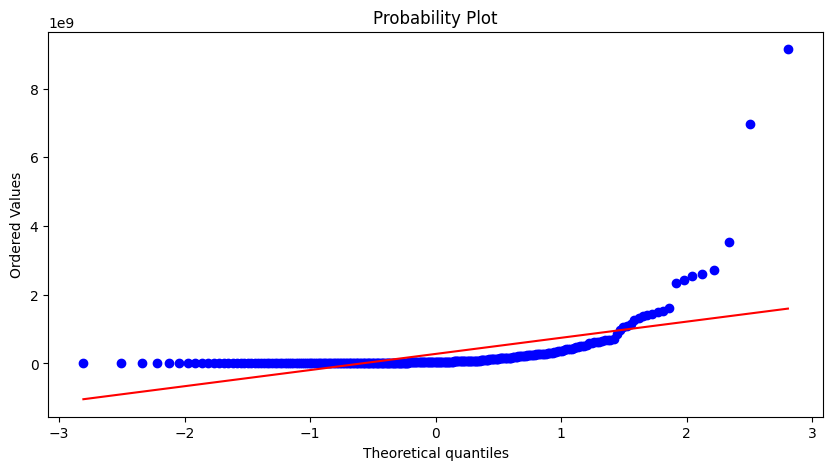

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))    # 그래프 사이즈 지정
stats.probplot(df_hos.iloc[:,7], dist=stats.norm, plot=plt) #Sample은 어느 정도 어긋났는지 비교할 분포,
                                                  #dist는 기준이 되는 분포, 정규 분포가 아니어도 된다.
                                                  #plot은 주로 matplotlib.plt 객체 사용
plt.show()

## SVD를 위한 작업

데이터의 양은 독립변수 수의 3배 이상은 돼야 함.
독립변수로 작용하는 컬럼 수가 57개이므로 다중 공선성과 과적합, 차원의 저주의 영향이 예상되므로
차원 축소 필요

In [28]:
scaler = MinMaxScaler()

scalerX = scaler.fit(df_hos.iloc[:,1:])

X_mmsc = scaler.transform(df_hos.iloc[:,1:])

X_mmsc

array([[0.23986369, 0.26676829, 0.02793066, ..., 1.        , 0.        ,
        0.        ],
       [0.01119688, 0.71341463, 0.00665246, ..., 1.        , 0.        ,
        0.        ],
       [0.42708116, 0.53810976, 0.48018107, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.1673969 , 0.55945122, 0.07999757, ..., 1.        , 0.        ,
        0.        ],
       [0.15348773, 0.        , 0.03642697, ..., 1.        , 0.        ,
        0.        ],
       [0.31288685, 0.32621951, 0.05042845, ..., 1.        , 0.        ,
        0.        ]])

## statsmodels를 사용한 vif 계산

In [ ]:
# 병원 개/폐업 정보의 다중 회귀 분석과 검정 통계량 확인
Models1 = sm.ols("OC ~ " + "+".join(df_drop_obj.columns[1:]), data=df_drop_obj)
result1 = Models1.fit()
print(result1.summary())

In [ ]:
# 독립변수 X와 종속변수 y로 분리
X = df_drop_obj.iloc[:,1:]
y = df_drop_obj.iloc[:,0]

In [ ]:
# 독립변수들간 다중 공선성 확인, vif 지수 10 이상이면 변수 제거 고려
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

In [ ]:
# vif 지수가 10미만인 컬럼명
vif[vif["VIF Factor"]<10.0]["features"]

In [ ]:
df_drop_vif = df_drop_obj[["OC","bedCount", "openDate", "receivableS2", "receivableS1"]]

In [ ]:
Models2 = sm.ols("OC ~ " + "+".join(df_drop_vif.columns[1:]), data=df_drop_vif)
result2 = Models2.fit()
print(result2.summary())

In [ ]:
"""
vif 지수가 10 이상이라고 무조건 제거하면 안 됨!
"""

# 모델학습

In [ ]:
df["OC"].value_counts()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=626, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
model_xgb = XGBClassifier()
xgb_model = model_xgb.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)[:1]

In [ ]:
print(y_pred)

In [ ]:
print(y_pred_prob)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
f1__score(y_test, y_pred)

In [ ]:
X2 = df_drop_vif.iloc[:,1:]
y2 = df_drop_vif.iloc[:,0]

X_train2, X_test2, y_train2, y_test2= train_test_split(X2, y2, test_size=0.2, random_state=626, stratify=y2)
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

model_xgb2 = XGBClassifier()
xgb_model2 = model_xgb2.fit(X_train2, y_train2)

y_pred2 = xgb_model2.predict(X_test2)
y_pred_prob2 = xgb_model2.predict_proba(X_test2)[:1]

print("정확도 : ",accuracy_score(y_test2, y_pred2))
print("f1 socre : ",f1_score(y_test2, y_pred2))

# 병원 정보 api 불러오기

In [ ]:
"""
https://apis.data.go.kr/B551182/hospInfoServicev2/getHospBasisList?serviceKey=repbMvjCXw96iTs6wjKM3Htm1H480VcdawruKmikMmOYZF8aVD%2FrJDkfGoyLeTuS5Y1KEOzUrwwPIu87UQ9LbQ%3D%3D&pageNo=1&numOfRows=10&sidoCd=110000&sgguCd=110019&emdongNm=%EC%8B%A0%EB%82%B4%EB%8F%99&yadmNm=%EC%84%9C%EC%9A%B8%EC%9D%98%EB%A3%8C%EC%9B%90&zipCd=2010&clCd=11&dgsbjtCd=01&xPos=127.09854004628151&yPos=37.6132113197367&radius=3000
"""

In [ ]:
serviceKey = "repbMvjCXw96iTs6wjKM3Htm1H480VcdawruKmikMmOYZF8aVD/rJDkfGoyLeTuS5Y1KEOzUrwwPIu87UQ9LbQ=="
serviceKeyDecoded = parse.unquote(serviceKey, 'UTF-8')

url = "http://apis.data.go.kr/B551182/hospInfoServicev2/getHospBasisList"
returnType="xml"
Pindex = 1
Psize = 1000


queryParams = '?' + parse.urlencode({ parse.quote_plus("serviceKey") : serviceKeyDecoded,
                                parse.quote_plus("numOfRows") : '10000',
                                parse.quote_plus("pageNo") : '2'
                                    })

res = requests.get(url + queryParams)

In [ ]:
soup = BeautifulSoup(res.text, 'lxml-xml')
items = soup.find_all("item")

In [ ]:
pprint.pprint(items)

In [ ]:
len(items)

In [ ]:
def parse():
    try:
        ADDR = item.find("addr").get_text()
        CLCD = item.find("clCd").get_text()
        CLCDNM = item.find("clCdNm").get_text()
        EMDONGNM = item.find("emdongNm").get_text()
        ESTBDB = item.find("estbDd").get_text()
        POSTNO = item.find("postNo").get_text()
        SGGUCD = item.find("sgguCd").get_text()
        SGGUCDNM = item.find("sgguCdNm").get_text()
        SIDOCD = item.find("sidoCd").get_text()
        SIDOCDNM = item.find("sidoCdNm").get_text()
        XPOS = item.find("XPos").get_text()
        YPOS = item.find("YPos").get_text()
        YADMNM = item.find("yadmNm").get_text()
        YKIHO = item.find("ykiho").get_text()
        return {
            "주소":ADDR,
            "종별코드":CLCD,
            "종별코드명":CLCDNM,
            "읍면동":EMDONGNM,
            "개설일자":ESTBDB,
            "Post No.":POSTNO,
            "시군구코드":SGGUCD,
            "시군구코드명":SGGUCDNM,
            "시도코드":SIDOCD,
            "시도코드명":SIDOCDNM,
            "x좌표":XPOS,
            'y좌표':YPOS,
            "요양기관명":YADMNM,
            "암호화요양기호":YKIHO
        }
    except AttributeError as e:
        return {
            "주소":None,
            "종별코드":None,
            "종별코드명":None,
            "읍면동":None,
            "개설일자":None,
            "Post No.":None,
            "시군구코드":None,
            "시군구코드명":None,
            "시도코드":None,
            "시도코드명":None,
            "x좌표":None,
            'y좌표':None,
            "요양기관명":None,
            "암호화요양기호":None
        }

In [ ]:
row = list()

for item in items : 
    row.append(parse())

In [ ]:
df_api = pd.DataFrame(row)
df_api.head()

In [ ]:
df_api.shape[0] - df_api.count()

In [ ]:
df_api.dropna(axis=0, how="any", inplace=True)
df_api.shape

In [ ]:
df_api.to_csv(dirShare+"/data/병원정보api_day2.csv",sep=',', encoding="utf-8")

In [ ]:
df_day1  = pd.read_csv(dirShare+"/data/병원정보api.csv")
df_day1.info()
df_day1.head(10)

In [ ]:
df_day2  = pd.read_csv(dirShare+"/data/병원정보api_day2.csv")
df_day2.info()
df_day2.head(10)

In [ ]:
df_day1.sort_values(by='종별코드', axis=0, ascending=True)

In [ ]:
df_day2.sort_values(by='종별코드', axis=0, ascending=True)